## Предсказание уровня дохода

Данный датасет представляет собой набор различных признаков, при помощи которых можно определить - зарабатывает ли человек больше 50 тысяч долларов в год или нет. То есть предлагается решить задачу классификации.

**income_>50K** - целевая переменная, годовой доход человека, 1 - зарабатывает более 50 тысяч долларов в год, 0 - зарабатывает меньше (int64).

**age** - возраст человека. Целочисленная переменная (int64)

**workclass** - вид занятости (на кого работает: на частную компанию, на государство, самозанятый и т.д.) (object).

**fnlwgt** - финансовый вес, не совсем понятно, что это означает, скорее всего, сумма всех заработанных денег (int64)

**education** - уровень образования (object)

**educational-num** - закодированные уровни образования, где каждое число принадлежит к одному из уровней образования из колонки **education** (int64)

**marital-status** - семейное положение (женат/не женат/разведен/никогда не был женат) (object)

**occupation** - сфера занятости (object)

**relationship** - положение в семье (муж/жена/не в семье/ребенок) (object)

**race** - раса (белый/черный/эскимос) (object)

**gender** - пол (object)

**capital-gain** - прирост капитала (int64)

**capital-loss** - потеря капитала (int64)

**hours-per-week** - количество рабочих часов в неделю (int64)

**native-country** - происхождение (из какой страны) (object)

Датасет взят с сайта Kaggle.com: https://www.kaggle.com/datasets/mastmustu/income?datasetId=168831&select=train.csv

Таким образом, **исследовательский вопрос** моей работы: какие факторы способствуют заработку более 50 тысяч долларов в год? Ответ на данный вопрос позволит прогнозировать финансовым организациям уровень материального благополучия своих клиентов, чтобы понимать - можно ли давать тому или иному человеку кредит, или нет.

Загрузим необходимые библиотеки для анализа и визуализации данных

In [459]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as st

In [460]:
df = pd.read_csv('final_project.csv')

In [461]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0


Датасет содержит 15 колонок и 43957 строк

In [462]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


### Описательные статистики

Посмотрим на описательные статистики той или иной переменной, а также на распределение переменных.

#### age

C:\Users\aksen\AppData\Local\Temp\ipykernel_9872\1820887624.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey', linestyle = '-.',


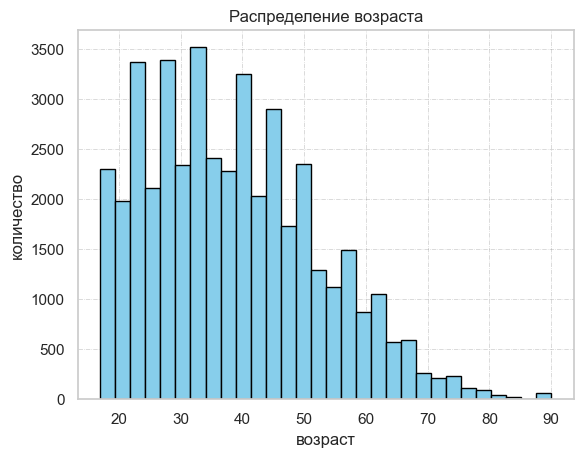

In [463]:
fig, ax = plt.subplots()

plt.hist(df['age'], bins = 30, edgecolor='black', color='skyblue')

plt.xlabel('возраст')
plt.ylabel('количество')
plt.title('Распределение возраста')
ax.grid(b = True, color ='grey', linestyle = '-.', 
        linewidth = 0.5, alpha = 0.4)

In [464]:
df['age'].describe()

count    43957.000000
mean        38.617149
std         13.734401
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

Как можно заметить, в датасете содержатся люди совершенно разных возрастов от 17 до 90 лет. Среднее значение возраста - 38.6 лет, а медиана - 37 лет, так как медиана немного меньше, чем среднее, можно сказать, что распределение немного скошено вправо, то есть большая часть значений содержится слева. Нижний квартиль равен 28 годам, то есть 25% людей в датасете младще 25 лет, а остальные 75% - старше. Верхний квартиль равен 48 годам, то есть 75% людей младше 48 лет, оставшиеся 25% - старше.

In [465]:
df.groupby(df['income_>50K'], as_index = False).agg({'age':'mean'})

,income_>50K,age
0,0,36.837914
1,1,44.273721


Также, если посмотреть на группировку значений целевой переменной в зависимости от возраста, то можно заметить, что средний возраст людей, имеющих зарплату выше 50 тысяч в год выше, чем у людей, имеющих более низкую зарплату.

#### workclass

C:\Users\aksen\AppData\Local\Temp\ipykernel_9872\3736780798.py:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, color='grey', linestyle='-', linewidth=0.5, alpha=0.4)


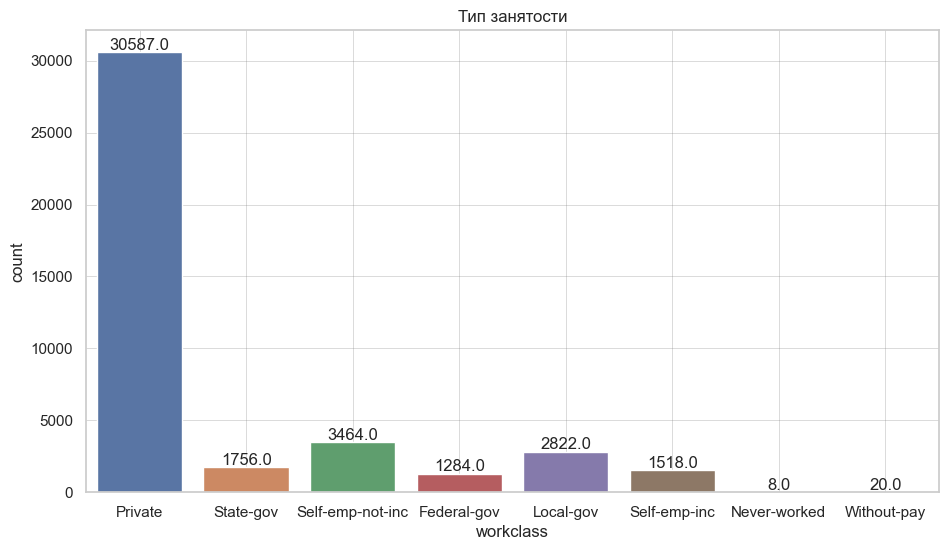

In [466]:
fig, ax = plt.subplots(figsize=(11, 6))
ax = sns.countplot(data=df, x='workclass')
plt.title('Тип занятости')
ax.grid(b=True, color='grey', linestyle='-', linewidth=0.5, alpha=0.4)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')

In [467]:
df['workclass'].describe()

count       41459
unique          8
top       Private
freq        30587
Name: workclass, dtype: object

Как можно заметить, наибольшее число людей работают у частника или на частную компанию (30587). 3464 человек являются самозанятыми. Меньше всего людей (8 человек) никогда не работали. 

C:\Users\aksen\AppData\Local\Temp\ipykernel_9872\4106013409.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey', linestyle = '-.',


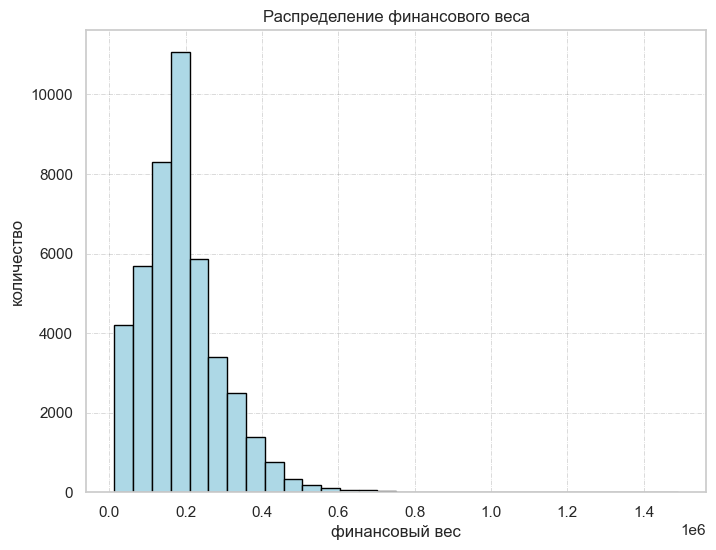

In [468]:
fig, ax = plt.subplots(figsize =(8, 6))

plt.hist(df['fnlwgt'], bins = 30, edgecolor='black', color='lightblue')

plt.xlabel('финансовый вес')
plt.ylabel('количество')
plt.title('Распределение финансового веса')
ax.grid(b = True, color ='grey', linestyle = '-.', 
        linewidth = 0.5, alpha = 0.4)

Распределение переменной fnlwgt также скошено вправо, то есть большинство значений находятся слева. Из-за сильного скоса переменной лучше использовать ее логарифмированное значение, так это позволит повысить качество модели, так как избавит распределение от сильных выбросов.

C:\Users\aksen\AppData\Local\Temp\ipykernel_9872\1591978747.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey', linestyle = '-.',


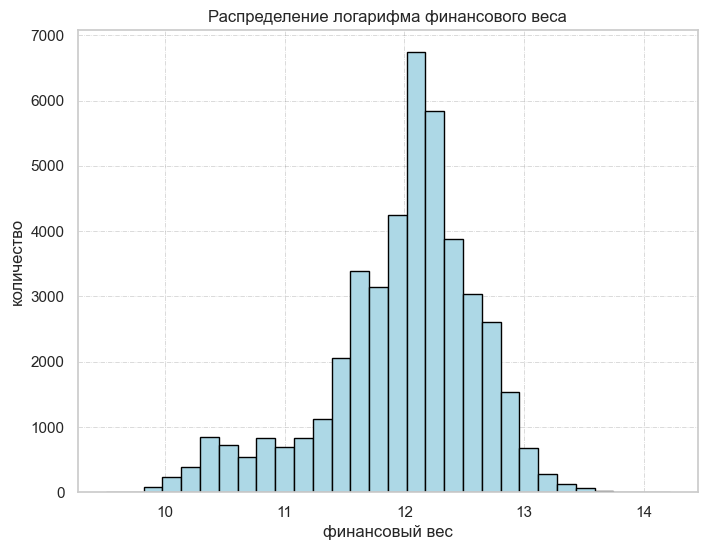

In [469]:
# Построим график распределения логарифма финансового веса
fig, ax = plt.subplots(figsize =(8, 6))

plt.hist(np.log(df['fnlwgt']), bins = 30, edgecolor='black', color='lightblue')

plt.xlabel('финансовый вес')
plt.ylabel('количество')
plt.title('Распределение логарифма финансового веса')
ax.grid(b = True, color ='grey', linestyle = '-.', 
        linewidth = 0.5, alpha = 0.4)

Теперь у распределения меньше очевидных выбросов, а само распределение больше напоминает нормальное.

Посмотрим на группировку признака и целевой переменной по среднему значению финансового веса.

In [470]:
df.groupby(df['income_>50K'], as_index = False).agg({'fnlwgt':'mean'})

,income_>50K,fnlwgt
0,0,190079.683364
1,1,188380.083761


In [471]:
st.pearsonr(df['income_>50K'], df['fnlwgt'])

PearsonRResult(statistic=-0.006852400437135777, pvalue=0.1508188538068128)

Как можно заметить, у людей с доходом более 50 тысяч средний финансовый вес меньше, чем у людей с доходом менее 50 тысяч, а корреляция между признаками отрицательная и очень незначительная. Лучше удалить эту переменную, так как она никак не способствует предсказанию годового заработка и вообще не очень понятно, что она означает.

#### Education

C:\Users\aksen\AppData\Local\Temp\ipykernel_9872\3007081780.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, color='grey', linestyle='-', linewidth=0.5, alpha=0.4)


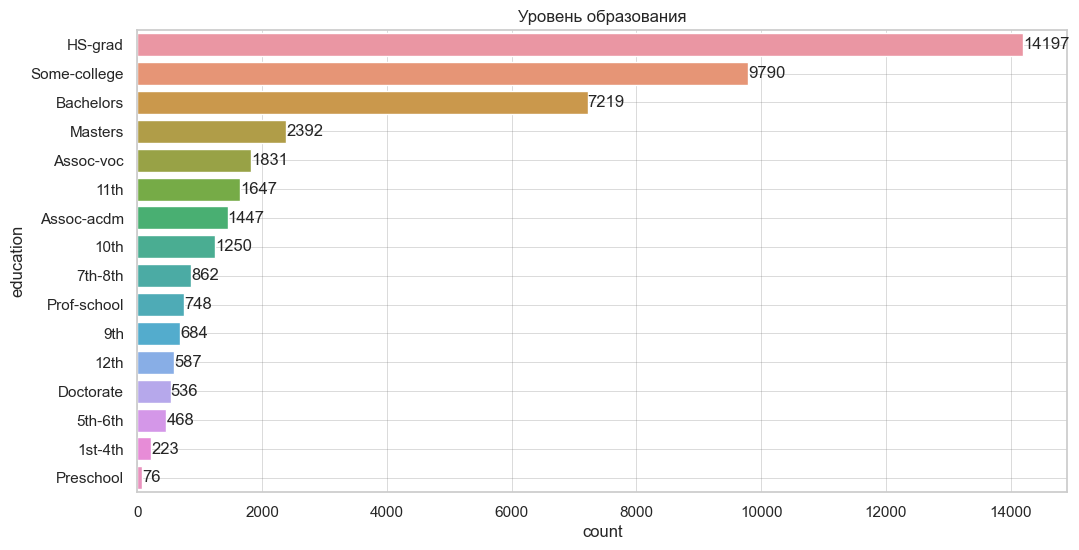

In [472]:
fig, ax = plt.subplots(figsize=(12, 6))
sorted_edu = df['education'].value_counts().sort_values(ascending=False)

sns.countplot(data=df, y='education', order=sorted_edu.index)
plt.title('Уровень образования')

ax.grid(b=True, color='grey', linestyle='-', linewidth=0.5, alpha=0.4)

for i, count in enumerate(sorted_edu):
    ax.text(count + 1, i, str(count), va='center')

plt.show()

Как можно заметить, наибольшее число людей в датасете окончили среднюю школу (hs-grad) 14197 человек, на втором месте люди, окончившие колледж (9790 человек), потом бакалавриат (7219 человек), магистратуру (2392 человека) и т.д. Меньше всего человек в датасете окончили только детский сад (76 человек).

Следующая колонка (educational-num) представляет собой то же, что и колонка education, только в ней то или иное значение закодировано. Так, например, HS-grad закодировано как 9, Doctorate как 16, Bachelors как 13 и т.д. То есть чем выше уровень образования, тем выше число. А значит, можно удалить признак education и пользоваться признаком educational-num.

In [473]:
df.groupby('income_>50K', as_index = False).agg({'educational-num':'mean'})

,income_>50K,educational-num
0,0,9.591704
1,1,11.607815


У людей с доходом выше 50 тысяч в год в среднем уровень образования выше, чем у людей с меньшим доходом.

#### marital-status

C:\Users\aksen\AppData\Local\Temp\ipykernel_9872\3469282926.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, color='grey', linestyle='-', linewidth=0.5, alpha=0.4)


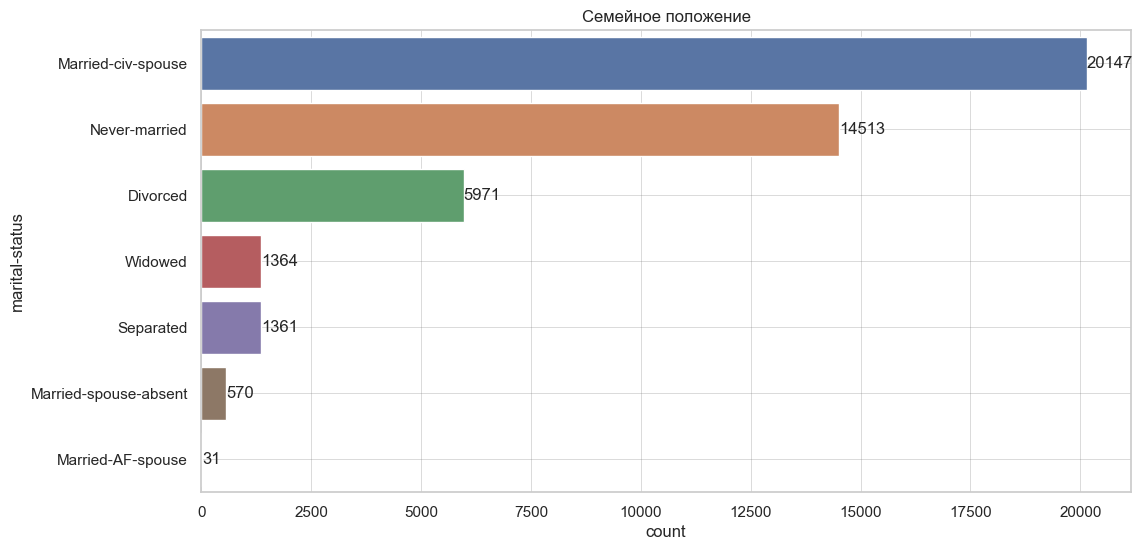

In [474]:
fig, ax = plt.subplots(figsize=(12, 6))
sorted_edu = df['marital-status'].value_counts().sort_values(ascending=False)

sns.countplot(data=df, y='marital-status', order=sorted_edu.index)
plt.title('Семейное положение')

ax.grid(b=True, color='grey', linestyle='-', linewidth=0.5, alpha=0.4)

for i, count in enumerate(sorted_edu):
    ax.text(count + 1, i, str(count), va='center')

plt.show()

Что касается семейного положения, то больше всего значений married-civ-spouse (20147), на втором месте never-married (14513), потом divorced (5971), потом widowed (1364), separated (1361), married-spouse-absent (570) и married-AF-spouse (31).

#### occupation

C:\Users\aksen\AppData\Local\Temp\ipykernel_9872\3270723512.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, color='grey', linestyle='-', linewidth=0.5, alpha=0.4)


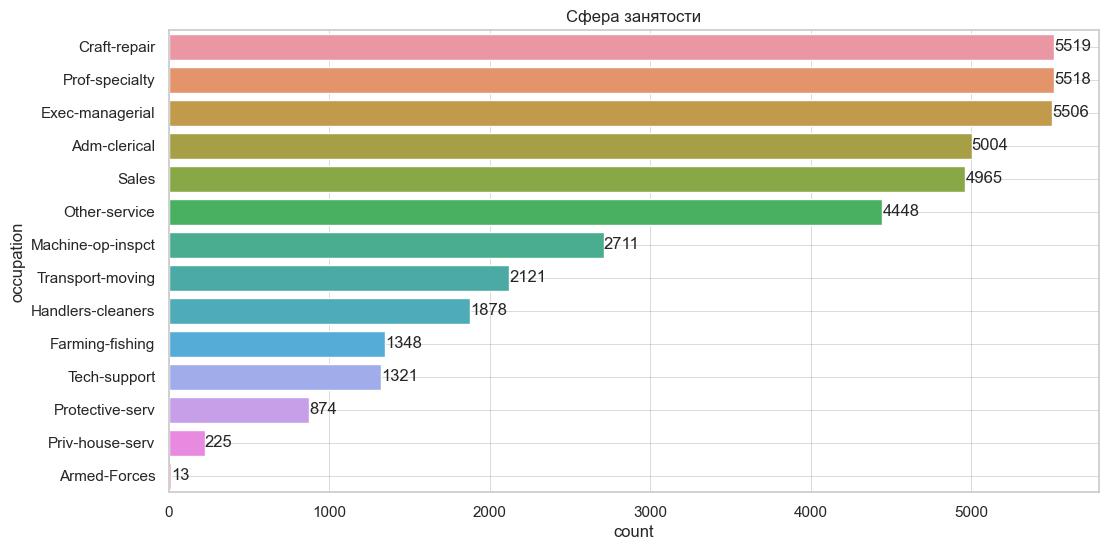

In [475]:
fig, ax = plt.subplots(figsize=(12, 6))
sorted_edu = df['occupation'].value_counts().sort_values(ascending=False)

sns.countplot(data=df, y='occupation', order=sorted_edu.index)
plt.title('Сфера занятости')

ax.grid(b=True, color='grey', linestyle='-', linewidth=0.5, alpha=0.4)

for i, count in enumerate(sorted_edu):
    ax.text(count + 1, i, str(count), va='center')

plt.show()

Как можно заметить, больше всего людей занято craft-repair (5519). Почти столько же prof-specialty (5518) и в exec-managerial (5506), меньше всего людей занято в armed-forces (13)

#### relationship

C:\Users\aksen\AppData\Local\Temp\ipykernel_9872\2911634248.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, color='grey', linestyle='-', linewidth=0.5, alpha=0.4)


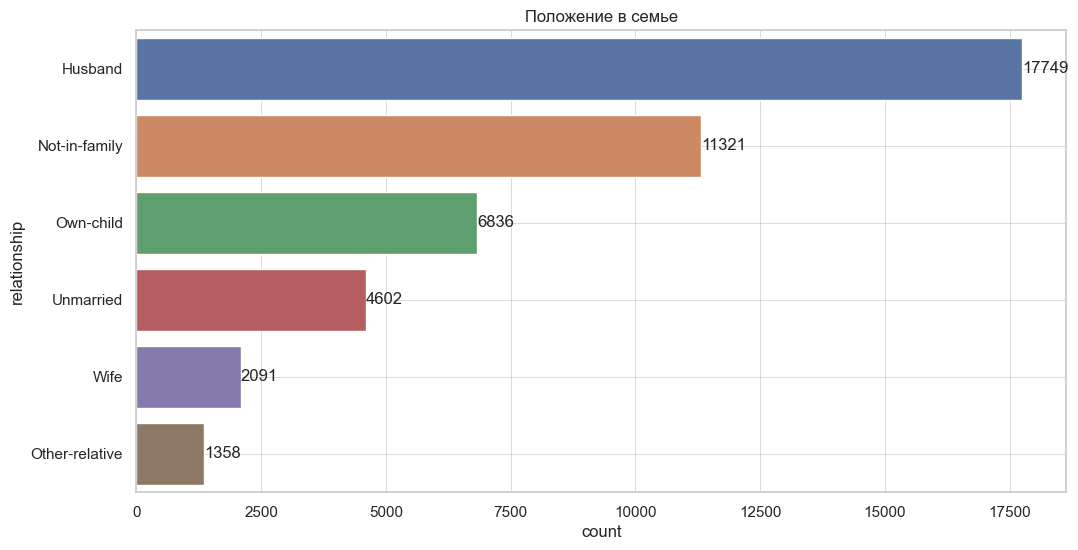

In [476]:
fig, ax = plt.subplots(figsize=(12, 6))
sorted_edu = df['relationship'].value_counts().sort_values(ascending=False)

sns.countplot(data=df, y='relationship', order=sorted_edu.index)
plt.title('Положение в семье')

ax.grid(b=True, color='grey', linestyle='-', linewidth=0.5, alpha=0.4)

for i, count in enumerate(sorted_edu):
    ax.text(count + 1, i, str(count), va='center')

plt.show()

Что касается положения в семье, то больше всего мужей (17749), вторым по счету идет вариант не в семье (11321), 6836 людей живут в семье родителей. 4602 не женаты, 2091 жен и меньше всего имеют какую-либо другую родственную связь.

#### race

C:\Users\aksen\AppData\Local\Temp\ipykernel_9872\3468556581.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, color='grey', linestyle='-', linewidth=0.5, alpha=0.4)


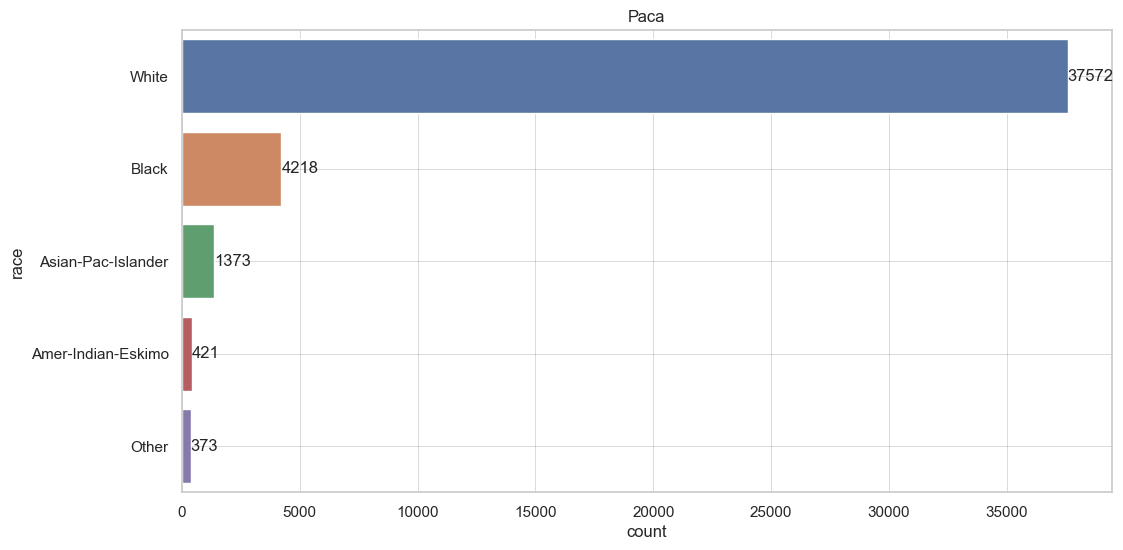

In [477]:
fig, ax = plt.subplots(figsize=(12, 6))
sorted_edu = df['race'].value_counts().sort_values(ascending=False)

sns.countplot(data=df, y='race', order=sorted_edu.index)
plt.title('Раса')

ax.grid(b=True, color='grey', linestyle='-', linewidth=0.5, alpha=0.4)

for i, count in enumerate(sorted_edu):
    ax.text(count + 1, i, str(count), va='center')

plt.show()

Подавляющее большинство людей в датасете относятся к белой расе (37572 человека), потом идут черные (4218 человек), потом тихоокеанские азиаты (1373), потом американо-индийские эскимосы (421) и остальные (373 человека). Однако лучше удалить этот признак, потому что подавляющее большинство значений в нем однотипные, что может исказить результаты предсказательной модели.

#### Gender

C:\Users\aksen\AppData\Local\Temp\ipykernel_9872\3915653371.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, color='grey', linestyle='-', linewidth=0.5, alpha=0.4)


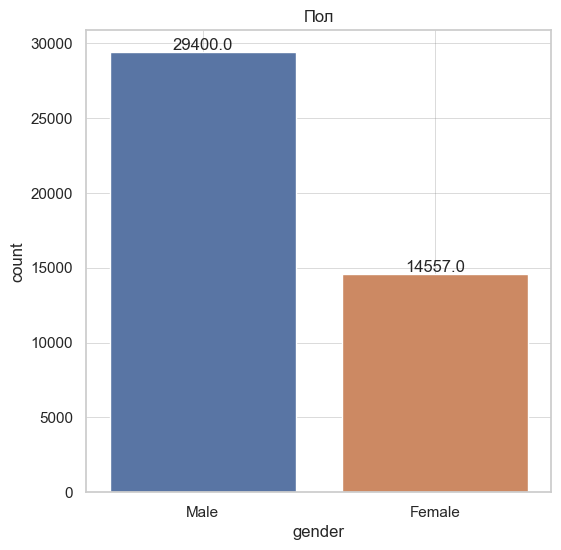

In [478]:
fig, ax = plt.subplots(figsize=(6, 6))
sorted_gender = df['gender'].value_counts().sort_values(ascending=False)

sns.countplot(data=df, x='gender', order=sorted_gender.index)
plt.title('Пол')

ax.grid(b=True, color='grey', linestyle='-', linewidth=0.5, alpha=0.4)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

Мужчин более чем в два раза больше, чем женщин. Мужчин 29400 человек, а женщин 14557 человек.

<AxesSubplot: xlabel='income_>50K', ylabel='count'>

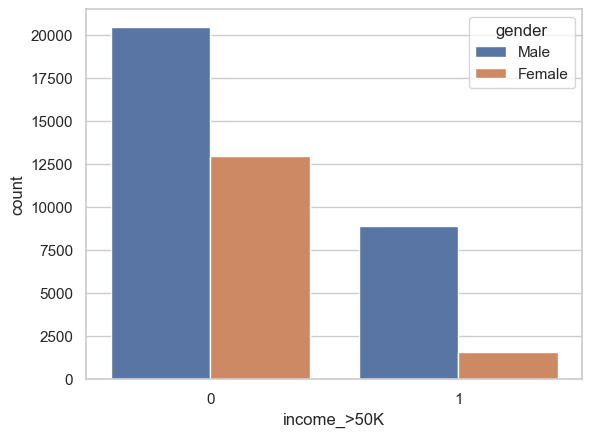

In [479]:
sns.countplot(data = df, x = 'income_>50K', hue  ='gender')

In [480]:
women = df.query('gender == "Female"')

In [481]:
men = df.query('gender == "Male"')

In [482]:
women['income_>50K'].mean()

0.1092258020196469

In [483]:
men['income_>50K'].mean()

0.3036734693877551

Если посмотреть на график дохода в зависимости от пола, то видно, что среди мужчин больше тех, кто зарабатывает больше 50 тысяч в год, чем среди женщин, даже при учете, что мужчин в принципе в датасете больше, это видно и если посмотреть на средние значения. Среди мужчин средний показатель дохода выше, чем у женщин.

#### Capital-gain

C:\Users\aksen\AppData\Local\Temp\ipykernel_9872\3099828370.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey', linestyle = '-.',


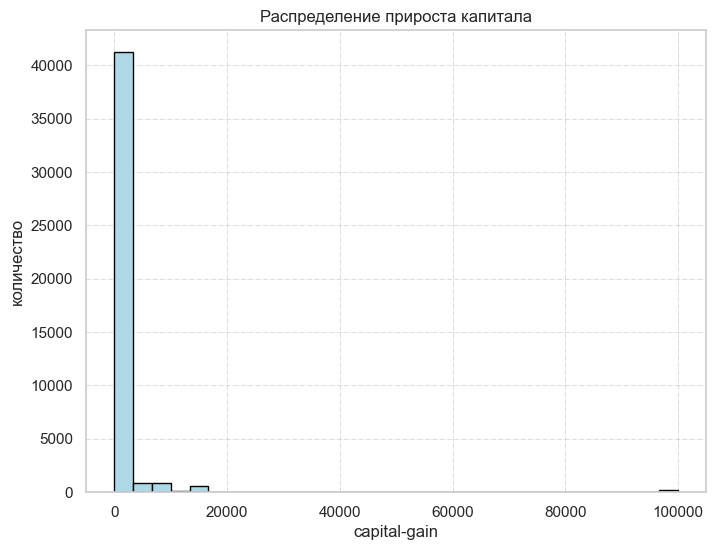

In [484]:
fig, ax = plt.subplots(figsize =(8, 6))

plt.hist(df['capital-gain'], bins = 30, edgecolor='black', color='lightblue')

plt.xlabel('capital-gain')
plt.ylabel('количество')
plt.title('Распределение прироста капитала')
ax.grid(b = True, color ='grey', linestyle = '-.', 
        linewidth = 0.5, alpha = 0.4)

In [485]:
df['capital-gain'].describe() #Описательные статистики для capital-gain

count    43957.000000
mean      1093.559797
std       7570.536063
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

Как можно заметить, большая часть значений равна нулю, на это указывает верхний квартиль, который равен нулю, при этом минимальное значение тоже равно нулю. Следовательно, данный признак будет мало полезен для предсказательной модели, так как он содержит низкую вариабельность. 

#### capital loss

C:\Users\aksen\AppData\Local\Temp\ipykernel_9872\274461260.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey', linestyle = '-.',


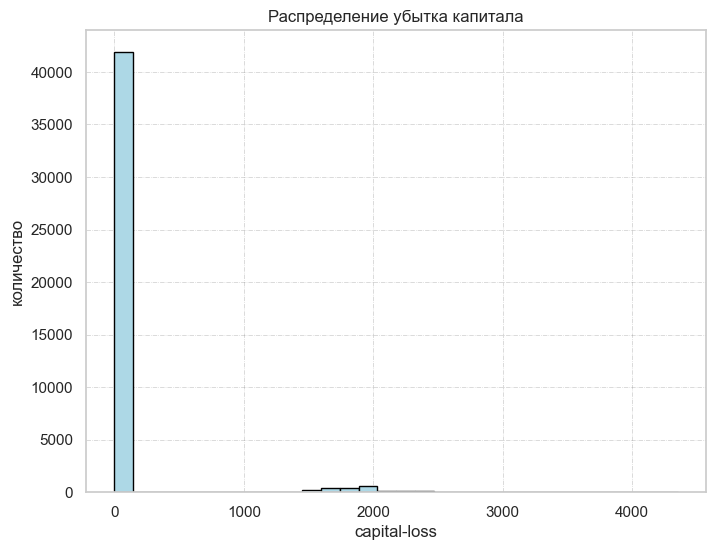

In [486]:
fig, ax = plt.subplots(figsize =(8, 6))

plt.hist(df['capital-loss'], bins = 30, edgecolor='black', color='lightblue')

plt.xlabel('capital-loss')
plt.ylabel('количество')
plt.title('Распределение убытка капитала')
ax.grid(b = True, color ='grey', linestyle = '-.', 
        linewidth = 0.5, alpha = 0.4)

In [487]:
df['capital-loss'].describe() # Описательные статистики для capital-loss

count    43957.000000
mean        88.246491
std        404.588410
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64

В данной переменной такая же ситуация, как и в предыдущей, тут тоже большая часть значений равна нулю, значит, данный признак также лучше удалить.

#### hours per week

C:\Users\aksen\AppData\Local\Temp\ipykernel_9872\3149636308.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey', linestyle = '-.',


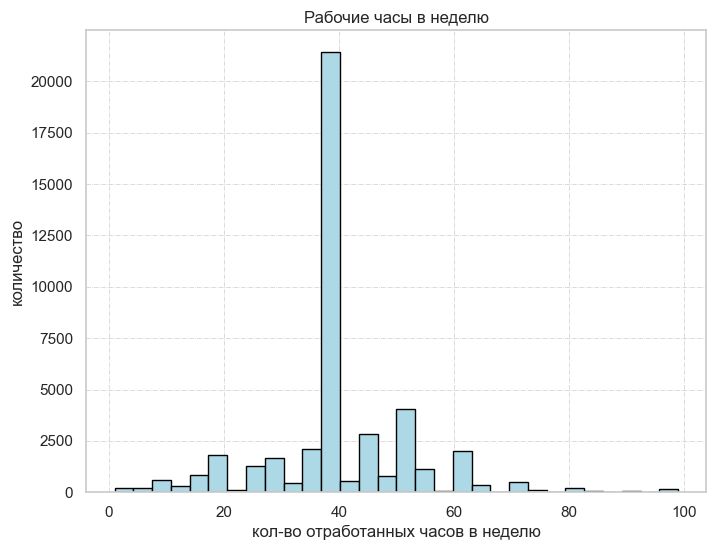

In [488]:
fig, ax = plt.subplots(figsize =(8, 6))

plt.hist(df['hours-per-week'], bins = 30, edgecolor='black', color='lightblue')

plt.xlabel('кол-во отработанных часов в неделю')
plt.ylabel('количество')
plt.title('Рабочие часы в неделю')
ax.grid(b = True, color ='grey', linestyle = '-.', 
        linewidth = 0.5, alpha = 0.4)

In [489]:
df['hours-per-week'].describe()

count    43957.000000
mean        40.407694
std         12.400303
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

Как можно заметить в переменной hours-per-week медиана и нижний квартиль равны 40, сдедовательно, минимум 25% значений точно равны 40 часам. Минимум равен 1, а максимум - 99 часам в неделю.

In [490]:
df.groupby('income_>50K', as_index = False).agg({'hours-per-week':'mean'})

,income_>50K,hours-per-week
0,0,38.822632
1,1,45.446948


Те, кто зарабатывает выше 50 тысяч долларов в год, работают в среднем больше часов.

#### native-country

In [491]:
df['native-country'].value_counts()

United-States                 39429
Mexico                          880
Philippines                     273
Germany                         188
Puerto-Rico                     167
Canada                          158
El-Salvador                     145
India                           134
Cuba                            124
China                           113
England                         109
South                           105
Dominican-Republic               97
Jamaica                          97
Italy                            94
Japan                            83
Guatemala                        79
Vietnam                          77
Columbia                         75
Poland                           72
Haiti                            71
Portugal                         59
Taiwan                           58
Iran                             52
Nicaragua                        46
Greece                           44
Ecuador                          42
Peru                        

C:\Users\aksen\AppData\Local\Temp\ipykernel_9872\449320394.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, color='grey', linestyle='-', linewidth=0.5, alpha=0.4)


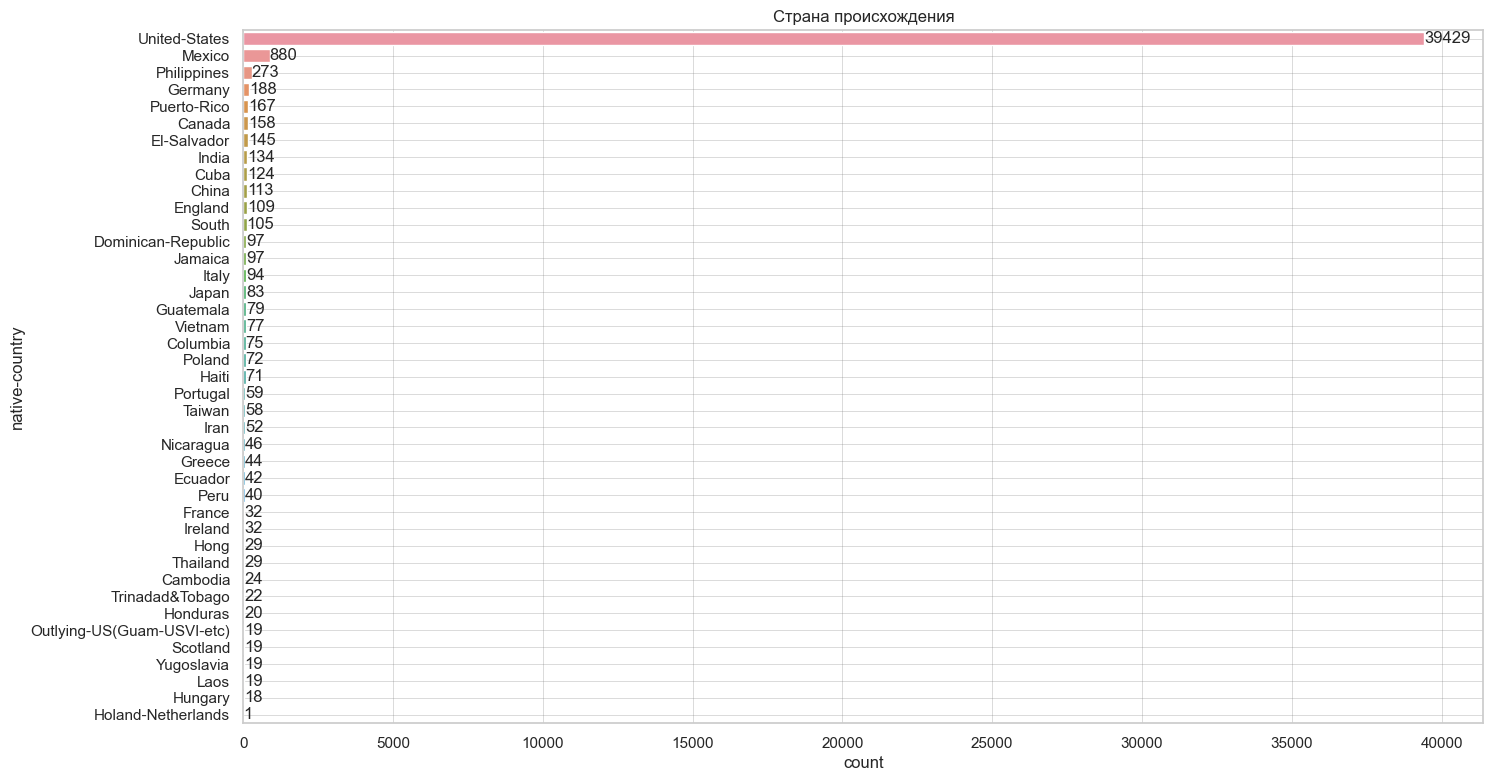

In [492]:
fig, ax = plt.subplots(figsize=(16, 9))
sorted_edu = df['native-country'].value_counts().sort_values(ascending=False)

sns.countplot(data=df, y='native-country', order=sorted_edu.index)
plt.title('Страна происхождения')

ax.grid(b=True, color='grey', linestyle='-', linewidth=0.5, alpha=0.4)

for i, count in enumerate(sorted_edu):
    ax.text(count + 1, i, str(count), va='center')

plt.show()

В признаке native-country также присутствует довольно много одинаковых значений, подавляющее большинство людей из США, лучше удалить данный признак.

#### Зависимая переменная - income_>50K

C:\Users\aksen\AppData\Local\Temp\ipykernel_9872\4010082044.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, color='grey', linestyle='-', linewidth=0.5, alpha=0.4)


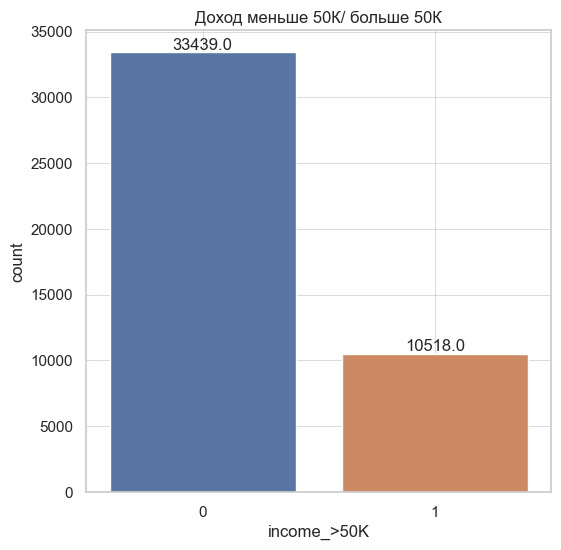

In [493]:
fig, ax = plt.subplots(figsize=(6, 6))
sorted_gender = df['income_>50K'].value_counts().sort_values(ascending=False)

sns.countplot(data=df, x='income_>50K', order=sorted_gender.index)
plt.title('Доход меньше 50К/ больше 50К')

ax.grid(b=True, color='grey', linestyle='-', linewidth=0.5, alpha=0.4)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

Что касается зависимой переменной, то у нее присутствует явный дисбаланс классов, большая часть значений равна нулю. Это стоит учитывать при интерпретации результатов модели и просмотре метрик. Так стоит меньше обращать внимание на accuracy и больше на другие метрики, в особенности f1-score.

#### Матрица корреляций

C:\Users\aksen\AppData\Local\Temp\ipykernel_9872\2524401068.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='coolwarm', annot = True);


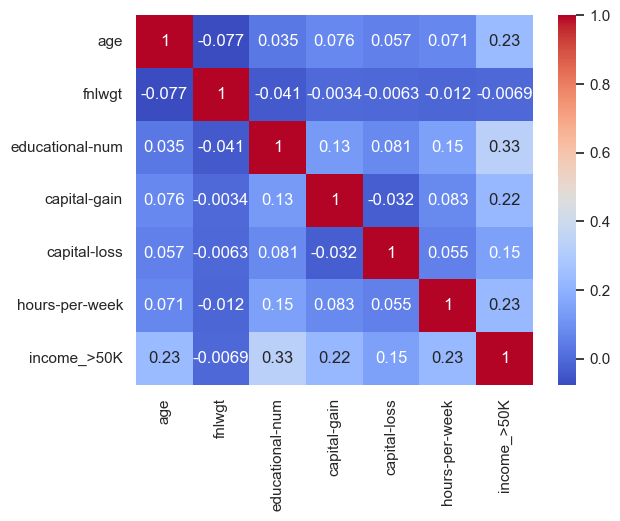

In [494]:
sns.heatmap(df.corr(), cmap='coolwarm', annot = True);

Из матрицы корреляций можно понять направление и силу связи между переменными, а также предупредить сильное влияние мультиколлинеарности. Однако между числовыми переменными нет сильной зависимости, следовательно, проблема мультиколлинеарности не должна возникнуть.

#### Удаление признаков

Теперь удалим признаки, которые я посчитал необходимыми удалить выше. А именно: education, fnlwgt, race, capital-gain, capital-loss, native-country.

In [495]:
del df['education']
del df['fnlwgt']
del df['race']
del df['capital-gain']
del df['capital-loss']
del df['native-country']

In [496]:
df

,age,workclass,educational-num,marital-status,occupation,relationship,gender,hours-per-week,income_>50K
0,67,Private,16,Divorced,Exec-managerial,Not-in-family,Male,60,1
1,17,Private,8,Never-married,Other-service,Own-child,Male,15,0
2,31,Private,13,Married-civ-spouse,Exec-managerial,Husband,Male,40,1
3,58,State-gov,4,Married-civ-spouse,Transport-moving,Husband,Male,40,0
4,25,State-gov,10,Never-married,Other-service,Not-in-family,Male,40,0
...,...,...,...,...,...,...,...,...,...
43952,52,Private,13,Married-civ-spouse,Exec-managerial,Husband,Male,50,1
43953,19,Private,9,Never-married,Other-service,Own-child,Female,40,0
43954,30,Private,10,Divorced,Sales,Not-in-family,Male,58,0
43955,46,Private,13,Never-married,Sales,Not-in-family,Female,35,0


#### Удаление пропущенных значений

In [497]:
df.isnull().sum()

age                   0
workclass          2498
educational-num       0
marital-status        0
occupation         2506
relationship          0
gender                0
hours-per-week        0
income_>50K           0
dtype: int64

Пропущенные значения присутствуют в двух колонках: workclass (2498 значений), occupation (2506 значений). Так как обе колонки являются текстовыми, то проще их удалить, хотя, конечно, можно было бы заполнить модой. Но я просто удалю пропущенные значения.

In [498]:
df = df.dropna()

In [499]:
df

,age,workclass,educational-num,marital-status,occupation,relationship,gender,hours-per-week,income_>50K
0,67,Private,16,Divorced,Exec-managerial,Not-in-family,Male,60,1
1,17,Private,8,Never-married,Other-service,Own-child,Male,15,0
2,31,Private,13,Married-civ-spouse,Exec-managerial,Husband,Male,40,1
3,58,State-gov,4,Married-civ-spouse,Transport-moving,Husband,Male,40,0
4,25,State-gov,10,Never-married,Other-service,Not-in-family,Male,40,0
...,...,...,...,...,...,...,...,...,...
43952,52,Private,13,Married-civ-spouse,Exec-managerial,Husband,Male,50,1
43953,19,Private,9,Never-married,Other-service,Own-child,Female,40,0
43954,30,Private,10,Divorced,Sales,Not-in-family,Male,58,0
43955,46,Private,13,Never-married,Sales,Not-in-family,Female,35,0


#### Кодирование переменных и создание новых признаков

Далее стоит закодировать переменные и ввести дамми-переменные. Во-первых, стоит закодировать gender, где Male будет равно нулю, а Female единице. Использую лямбда-функцию для замены

In [500]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Female' else 0)

C:\Users\aksen\AppData\Local\Temp\ipykernel_9872\3304188243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Female' else 0)


Остальные признаки имеют слишком много вариантов значений, поэтому их лучше преобразовать в дамми-переменные.

In [501]:
df = pd.get_dummies(df)

Также посмотрим наши независимые переменные на наличие выбросов с помощью графиков ящиков с усами.

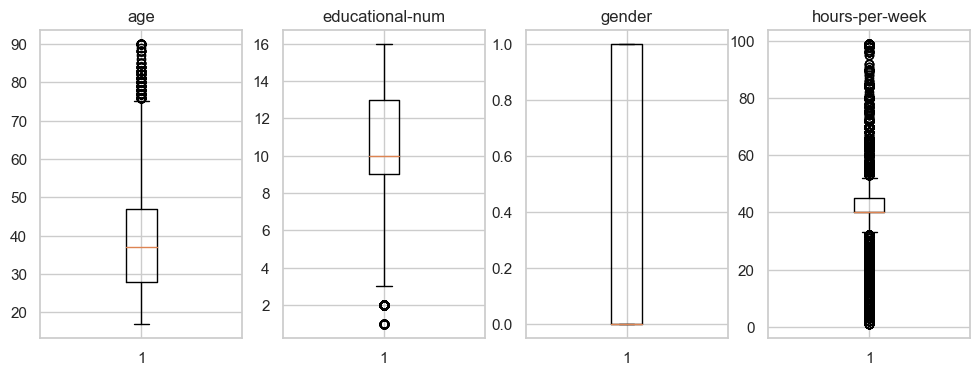

In [502]:
fig, axs = plt.subplots(1, 4, figsize=(12, 4))
axs[0].boxplot(df['age'])
axs[1].boxplot(df['educational-num'])
axs[2].boxplot(df['gender'])
axs[3].boxplot(df['hours-per-week'])

axs[0].set_title('age')
axs[1].set_title('educational-num')
axs[2].set_title('gender')
axs[3].set_title('hours-per-week');

Как можно заметить, выбросы есть в трех колонках - возраст, номер уровня образования и количество рабочих часов в неделю, но я не вижу смысла удалять выбросы или тем более удалять переменные с выбросами, потому что они могут быть важны для предсказания модели. В этом особенность этих признаков. И удаление выбросов может привести к значительному изменению результата нашей модели.

In [503]:
df

,age,educational-num,gender,hours-per-week,income_>50K,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,67,16,0,60,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,17,8,0,15,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,31,13,0,40,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,58,4,0,40,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,25,10,0,40,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,13,0,50,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
43953,19,9,1,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
43954,30,10,0,58,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
43955,46,13,1,35,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [504]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41451 entries, 0 to 43956
Data columns (total 39 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   age                                   41451 non-null  int64
 1   educational-num                       41451 non-null  int64
 2   gender                                41451 non-null  int64
 3   hours-per-week                        41451 non-null  int64
 4   income_>50K                           41451 non-null  int64
 5   workclass_Federal-gov                 41451 non-null  uint8
 6   workclass_Local-gov                   41451 non-null  uint8
 7   workclass_Private                     41451 non-null  uint8
 8   workclass_Self-emp-inc                41451 non-null  uint8
 9   workclass_Self-emp-not-inc            41451 non-null  uint8
 10  workclass_State-gov                   41451 non-null  uint8
 11  workclass_Without-pay                 414

Теперь наш датасет содержит 37 признаков, не считая целевую переменную.

Теперь, закончив с предобработкой датасета, можно перейти к выдвижению гипотез и непосредственному решению задачи классификации.

Так, на основании проделанного разведывательного анализа данных, я выдвигаю ряд гипотез.

**Гипотеза 1**: с увеличением возраста увеличивается шанс, что человек будет зарабатывать больше 50 тысяч в год. На это указывает то, что возраст людей с зарплатой выше 50 тысяч в год выше, чем возраст тех, кто зарабатывает меньше.

**Гипотеза 2**: чем выше образование у человека, тем скорее он будет зарабатывать выше 50 тысяч долларов в год. На это указывает то, что у людей с доходом выше 50 тысяч в год в среднем уровень образования выше.

**Гипотеза 3**: если человек оказывается мужчиной, он более вероятно будет зарабатывать более 50 тысяч долларов в год. На это указывает, что в среднем в датасете больше мужчин, которые зарабатывают больше 50 тысяч долларов в год.

**Гипотеза 4**: чем больше человек работает в неделю, тем более вероятно, что он будет зарабатывать более 50 тысяч в год. На это указывает то, что в среднем те, кто имеет более 50 тысяч долларов в год, работаю больше времени в неделю, чем те, кто зарабатывает меньше.

Стоит также сказать, какие модели я буду использовать. Так как я собираюсь решить задачу классификации, то я использую baseline-модель c самым частым классом, логистическую регрессию, случайный лес и градиентный бустинг. В качестве метрик я буду смотреть на precision, recall, f1-score. Precision означает долю правильно классифицированных положительных объектов от общего числа объектов, классифицированных как положительные. Recall означает долю положительных объектов, которые модель смогла обнаружить. F1-score - это сбалансированная мера, учитывающая и precision и recall.

Теперь разделим датасет на тестовую и контрольную выборки.

In [505]:
y = df['income_>50K']
X = df.drop(['income_>50K'], axis=1)

In [506]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=42)

Стоим baseline модель

In [507]:
import numpy as np
y_naive = np.zeros(len(y))
from sklearn.metrics import accuracy_score

accuracy_score(y, y_naive)

0.7519480832790524

In [508]:
from sklearn.metrics import classification_report
print("naive:\n", classification_report(y, y_naive))

naive:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86     31169
           1       0.00      0.00      0.00     10282

    accuracy                           0.75     41451
   macro avg       0.38      0.50      0.43     41451
weighted avg       0.57      0.75      0.65     41451



c:\users\aksen\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\aksen\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\aksen\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Accuracy наивной модели равен 0.751948, если все получают меньше 50 тысяч в год. При этом f1-score равен 0.86 для предсказаний нуля, а для предсказания единицы он будет равен значит 1 - 0.86 = 0.14

In [516]:
# Логичестическая регрессия:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(Xtrain, ytrain)
preds_test = model.predict(Xtest)
accuracy_score(ytest, preds_test)

c:\users\aksen\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8337597777615323

In [517]:
print("Logistic Regression:\n", classification_report(ytest, preds_test))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89     10257
           1       0.70      0.59      0.64      3422

    accuracy                           0.83     13679
   macro avg       0.78      0.75      0.77     13679
weighted avg       0.83      0.83      0.83     13679



Как можно заметить, accuracy значительно возрасло по сравнению c baseline моделью и составляет теперь 0.83376, f1-score при предсказании единицы составляет 0.64. precision составляет 0.7, то есть правильно положительными объектами модель определяет 70% наблюдений, а recall равен 0.59, то есть модель нашла 59% положительных объектов из всех объектов положительного класса, то есть класса, где доход больше 50 тысяч долларов в год.

Посмотрим на значения коэффициентов при независимых переменных, чтобы ответить на гипотезы.

In [519]:
coefficients = model.coef_
features = list(X.columns)
for features, coefficient in zip(features, coefficients[0]):
    print(f'{features}: {coefficient}')

age: 0.024279965523486685
educational-num: 0.25708855154406857
gender: -1.0880626351627816
hours-per-week: 0.026216970546763935
workclass_Federal-gov: -0.0012415419275346295
workclass_Local-gov: -0.7992143648106029
workclass_Private: -0.7456107555043086
workclass_Self-emp-inc: -0.2684396102504947
workclass_Self-emp-not-inc: -1.1465155642921654
workclass_State-gov: -0.9297367582382517
workclass_Without-pay: -0.004406627572462605
marital-status_Divorced: -1.1549702570674332
marital-status_Married-AF-spouse: 0.059576853851595835
marital-status_Married-civ-spouse: 0.23496030595046724
marital-status_Married-spouse-absent: -0.3183739551791689
marital-status_Never-married: -1.5431834737261099
marital-status_Separated: -0.6975582071038448
marital-status_Widowed: -0.4756164893210797
occupation_Adm-clerical: -0.17247280404455115
occupation_Armed-Forces: 0.0045566430205250495
occupation_Craft-repair: -0.15353183427583666
occupation_Exec-managerial: 0.606762847397441
occupation_Farming-fishing: -1

Можно сказать, что все гипотезы подтвердились, так как, действительно знак при коэффициенты переменной age положительный, следовательно, увеличение возраста увеличивает шансы нахождения целевой переменной в положительном классе. То же касается второй гипотезы: увеличение уровня образования увеличивает шансы нахождения переменной в положительном классе. Третья гипотеза также подтвердилась, поскольку увеличение значения независимой переменной, то есть если человек является женщиной, уменьшает шанс нахождения данного значения в положительном классе, то есть иметь доход выше 50 тысяч долларов в год. И четрвертая гипотеза подтвердилась, так как знак у коэффициента переменной hours-per-week положительный, следовательно, увеличение количества рабочих часов в неделю способствует увеличению шансов нахождения значения в положительном классе.

Теперь посмотрим на то, как справляется с решением данной задачи классификации случайный лес со 100 деревьями.

In [511]:
from sklearn import ensemble
rf_clf_2d = ensemble.RandomForestClassifier(n_estimators=100)

rf_clf_2d.fit(Xtrain, ytrain)

y_pred = rf_clf_2d.predict(Xtest)

print("Random Forest:\n", classification_report(ytest, y_pred))

Random Forest:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88     10257
           1       0.64      0.56      0.60      3422

    accuracy                           0.81     13679
   macro avg       0.75      0.73      0.74     13679
weighted avg       0.80      0.81      0.81     13679



Случайный лес со ста деревьями выдает качесто модели меньше, чем логистическая регрессия. Так, accuracy теперь равен 0.81, precision 0.64, recall 0.56, f1-score 0.6.

Попробуем сделать перебор различных параметров для случайного леса, чтобы найти лучшую комбинацию параметров, выдающую наивысшее качество.

In [512]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score

param_grid = {
    'n_estimators': [100, 200, 300], # количество деревьев
    'max_depth': [None, 5, 10], # максимальная глубина дерева
    'min_samples_split': [2, 5, 10], #минимальное количество выборок, необходимое для разделения внутреннего узла
    'min_samples_leaf': [1, 2, 4], #минимальное количество выборок, необходимое для нахождения в конечном узле
}


rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1')

grid_search.fit(Xtrain, ytrain)

print("Наилучшие параметры:", grid_search.best_params_)
print("Наилучшее значение f1-меры:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(Xtest)
f1 = f1_score(ytest, y_pred)
print("f1-мера на тестовой выборке:", f1)

Наилучшие параметры: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Наилучшее значение f1-меры: 0.6277500380230627
f1-мера на тестовой выборке: 0.6376671499919445


Построим модель случайного леса с этими наилучшими гиперпараметрами

In [520]:
rf_clf_2d = ensemble.RandomForestClassifier(n_estimators=300, max_depth = None, min_samples_split = 10, min_samples_leaf = 2, random_state = 42)

rf_clf_2d.fit(Xtrain, ytrain)

y_pred = rf_clf_2d.predict(Xtest)

print("Random Forest:\n", classification_report(ytest, y_pred))

Random Forest:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89     10257
           1       0.71      0.58      0.64      3422

    accuracy                           0.84     13679
   macro avg       0.79      0.75      0.77     13679
weighted avg       0.83      0.84      0.83     13679



Использование GridSearch позволил повысить качество f1-score c 0.6, до 0.64. А accuracy повысился до 0.84, precision до 0.71, а recall упал до 0.58.

In [526]:
importances = rf_clf_2d.feature_importances_
features = list(X.columns)
sorted_indices = np.argsort(importances)[::-1]

for index in sorted_indices:
    print(f"{features[index]}: {importances[index]}")

educational-num: 0.18223227025441727
age: 0.17585967170475736
marital-status_Married-civ-spouse: 0.13503969467856605
hours-per-week: 0.1053723512894522
relationship_Husband: 0.09231790465454809
marital-status_Never-married: 0.043839717792305576
occupation_Exec-managerial: 0.03456019294646994
occupation_Prof-specialty: 0.028101398022147447
gender: 0.018586187621554673
relationship_Not-in-family: 0.01762739522490067
relationship_Wife: 0.016802906330770827
relationship_Own-child: 0.013740594177644127
occupation_Other-service: 0.013605450822135849
workclass_Self-emp-not-inc: 0.011600040727196068
workclass_Private: 0.009891157334981084
relationship_Unmarried: 0.009304023275556997
marital-status_Divorced: 0.00884212734646492
workclass_Self-emp-inc: 0.00854794078603
occupation_Sales: 0.008250863118939416
occupation_Craft-repair: 0.0074041448458693595
occupation_Farming-fishing: 0.0068153894884434435
occupation_Machine-op-inspct: 0.005882377340541126
occupation_Transport-moving: 0.005810729259

Если посмотреть на важность признаков для предсказания зависимой переменной в модели случайного леса, то наибольшей значимостью обладают следующие признаки: educational-num: 0.18223227025441727, age: 0.17585967170475736, marital-status_Married-civ-spouse: 0.13503969467856605. У переменной gender значимость относительно низкая и равна 0.018586187621554673.


Теперь проверим модель на градиентном бустинге.

In [515]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(Xtrain, ytrain)
y_preds = gb.predict(Xtest)
print("GB_Classifier:\n", classification_report(ytest, y_preds))

GB_Classifier:
               precision    recall  f1-score   support

           0       0.87      0.92      0.90     10257
           1       0.72      0.58      0.64      3422

    accuracy                           0.84     13679
   macro avg       0.79      0.75      0.77     13679
weighted avg       0.83      0.84      0.83     13679



Градиентный бустинг справляется с задачей почти также, как и случайный лес с набором лучших гиперпараметров, то есть accuracy равен 0.84, precision 0.72, recall 0.58, f1-score 0.64. Только precision повысился на 0.01

Теперь сделаем перебор гиперпараметров для градиентного бустинга

In [362]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

model_for_gs = GradientBoostingClassifier(random_state = 42)

params = {
    "n_estimators":2**np.arange(4), # Количество оценщиков, выбранных при ранней остановке
    "learning_rate":0.1**np.arange(2), # Скорость обучения
    'max_depth': [3, 5, 7]} # максимальная глубина

gs = GridSearchCV(model_for_gs, 
                  params, 
                  cv=3, 
                  scoring=make_scorer(f1_score),
                  verbose=5)
 
gs.fit(Xtrain, ytrain)
 
print("Лучшие гиперпараметры:", gs.best_params_)
print("Лучшее значение метрики:", gs.best_score_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END learning_rate=1.0, max_depth=3, n_estimators=1;, score=0.500 total time=   0.0s
[CV 2/3] END learning_rate=1.0, max_depth=3, n_estimators=1;, score=0.521 total time=   0.0s
[CV 3/3] END learning_rate=1.0, max_depth=3, n_estimators=1;, score=0.535 total time=   0.0s
[CV 1/3] END learning_rate=1.0, max_depth=3, n_estimators=2;, score=0.528 total time=   0.0s
[CV 2/3] END learning_rate=1.0, max_depth=3, n_estimators=2;, score=0.564 total time=   0.0s
[CV 3/3] END learning_rate=1.0, max_depth=3, n_estimators=2;, score=0.585 total time=   0.0s
[CV 1/3] END learning_rate=1.0, max_depth=3, n_estimators=4;, score=0.564 total time=   0.0s
[CV 2/3] END learning_rate=1.0, max_depth=3, n_estimators=4;, score=0.588 total time=   0.1s
[CV 3/3] END learning_rate=1.0, max_depth=3, n_estimators=4;, score=0.613 total time=   0.1s
[CV 1/3] END learning_rate=1.0, max_depth=3, n_estimators=8;, score=0.611 total time=   0.2s
[CV 2/3] 

In [361]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(learning_rate = 1, max_depth = 7, n_estimators = 1, random_state = 42)
gb.fit(Xtrain, ytrain)
y_preds = gb.predict(Xtest)
print("GB_Classifier:\n", classification_report(ytest, y_preds))

GB_Classifier:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89     10257
           1       0.66      0.64      0.65      3422

    accuracy                           0.83     13679
   macro avg       0.77      0.77      0.77     13679
weighted avg       0.83      0.83      0.83     13679



При помощи gridSearch удалось повысить качество модели. f1-score теперь составляет 0.65, однако accuracy сократился до 0.83, precision до 0.66, зато вырос recall до 0.64. Посмотрим на значимость признаков для градиентного бустинга.

In [527]:
importances = gb.feature_importances_
features = list(X.columns)
sorted_indices = np.argsort(importances)[::-1]

for index in sorted_indices:
    print(f"{features[index]}: {importances[index]}")

marital-status_Married-civ-spouse: 0.4843360636138081
educational-num: 0.26336598584840903
age: 0.08823531250156731
hours-per-week: 0.06211058106502534
occupation_Exec-managerial: 0.027516078323462752
occupation_Prof-specialty: 0.0144165066859646
workclass_Self-emp-not-inc: 0.00966026162007278
occupation_Other-service: 0.009157177308356057
gender: 0.006287081505436963
relationship_Wife: 0.006267384386634658
occupation_Farming-fishing: 0.005321637746873968
occupation_Sales: 0.0038030402910196087
workclass_Self-emp-inc: 0.0029806795918968783
workclass_Federal-gov: 0.002407709592302691
occupation_Tech-support: 0.002284054063906997
relationship_Husband: 0.0017975988332436079
occupation_Machine-op-inspct: 0.0014962347394291537
marital-status_Married-AF-spouse: 0.0012971890854729534
occupation_Handlers-cleaners: 0.0009841507332743113
workclass_Private: 0.0007590546428352844
relationship_Own-child: 0.0007301957013891266
workclass_Local-gov: 0.0006685399155609206
occupation_Adm-clerical: 0.000

Наибольшей значимостью обладает признак marital-status_Married-civ-spouse: 0.4843360636138081, который важен для прогноза целевой переменной практически на половину, относительно всех остальных признаков. Следующими по важности признаками являются educational-num: 0.26336598584840903, age: 0.08823531250156731, hours-per-week: 0.06211058106502534. Причемательно, что в градиентном бустинге получилось три совершенно незначимых признака для прогноза целевой переменной: occupation_Priv-house-serv, relationship_Unmarried, occupation_Armed-Forces.

Таким образом, лучше всего с решением данной задачи классификации справился градиентный бустинг. Он после перебора гиперпараметров выдал f1-score равный 0.65, что является лучшим показателем среди всех моделей. Впрочем, не сказать, что все остальные модели справились сильно хуже, нигде f1-score не опускался ниже 0.6. Мне удалось решить данную задачу классификации, ответить на исследовательский вопрос, а именно определить факторы, которые наиболее сильно влияют на предсказание целевой переменной, а также подтвердить все выдвинутые гипотезы.